In [1]:
# import required libraries
import numpy as np
import pandas as pd

In [10]:

df = pd.read_csv("/content/smaller_adult.csv")

In [11]:
df.head()

,age,workclass,educational-num,occupation,gender,hours-per-week,income
0,25,Private,7,Machine-op-inspct,Male,40,<=50K
1,38,Private,9,Farming-fishing,Male,50,<=50K
2,28,Local-gov,12,Protective-serv,Male,40,>50K
3,44,Private,10,Machine-op-inspct,Male,40,>50K
4,18,?,10,?,Female,30,<=50K


In [ ]:
# See the columns that contain a "?" and how many "?" are there in those columns
df.isin(['?']).sum()

In [13]:
#Replace ? with NaN
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)

In [14]:
#Drop all rows that contain a missing value
df.dropna(how='any', inplace=True)

In [15]:
df = df.drop_duplicates()

In [16]:
#Extract X and y from the dataframe , income column is the target column, rest columns are features
X = df.loc[:,['age', 'workclass', 'educational-num', 'occupation', 'gender', 'hours-per-week']]
y = df.loc[:,'income']

In [17]:
# Since y is a binary categorical column we will use label encoder to convert it into numerical columns with values 0 and 1
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [18]:
#First identify caterogical features and numeric features
numeric_features = X.select_dtypes('number')
categorical_features = X.select_dtypes('object')
categorical_features

,workclass,occupation,gender
0,Private,Machine-op-inspct,Male
1,Private,Farming-fishing,Male
2,Local-gov,Protective-serv,Male
3,Private,Machine-op-inspct,Male
5,Private,Other-service,Male
...,...,...,...
3568,Private,Machine-op-inspct,Male
3570,Private,Prof-specialty,Male
3571,Private,Craft-repair,Male
3572,Private,Exec-managerial,Female


In [19]:
#Convert categorical features into numeric
converted_categorical_features = pd.get_dummies(categorical_features)
converted_categorical_features.shape

(3122, 23)

In [20]:
#combine the converted categorical features and the numeric features together into a new dataframe called "newX"
all_features = [converted_categorical_features, numeric_features]
newX = pd.concat(all_features,axis=1, join='inner')
newX.shape

(3122, 26)

In [21]:
#Do a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.33, random_state=42)

In [22]:
# Fit the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_cfr = KNeighborsClassifier(n_neighbors=3)
knn_cfr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [23]:
# Use the fitted model to make prediction for test data
y_pred = knn_cfr.predict(X_test)

In [24]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7225994180407371

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

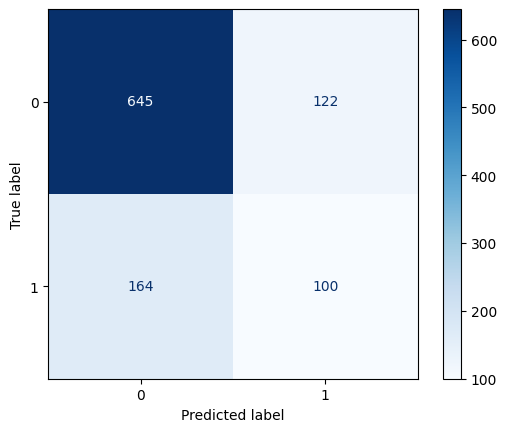

In [27]:
# Generate and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_cfr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

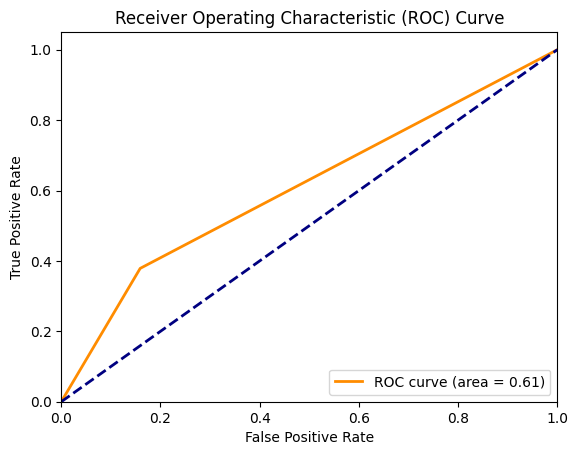

In [29]:
# Generate and display an ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()